In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#import os
%matplotlib inline
#warnings.filterwarnings('ignore')

In [19]:
!pip install finance-datareader

In [20]:
import FinanceDataReader as fdr
A = fdr.DataReader('084680', '2020-05-01', '2021-11-30')

#Prophet

In [21]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
392,2021-12-01,2001.976702,1858.766645,2131.857245
393,2021-12-02,1964.999610,1827.452090,2095.028457
394,2021-12-03,1930.336387,1803.360278,2062.540950
395,2021-12-04,1856.711445,1721.844699,1985.959744
396,2021-12-05,1820.843070,1680.621431,1959.082757
397,2021-12-06,1823.474246,1692.742118,1965.822576
398,2021-12-07,1792.421911,1659.960647,1933.237984
399,2021-12-08,1753.896683,1618.701285,1873.187244
400,2021-12-09,1713.579706,1571.956827,1840.233268
401,2021-12-10,1677.038584,1538.903540,1814.262660


시각화

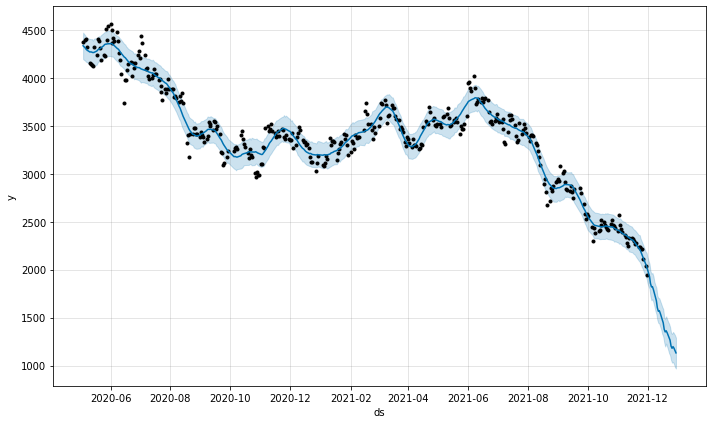

In [23]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

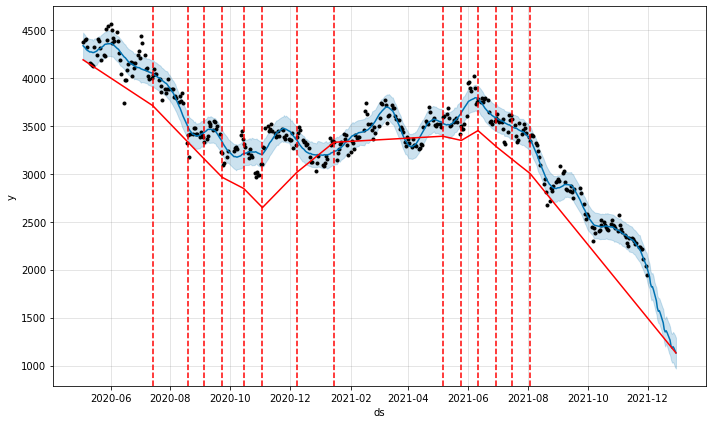

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [9]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:392]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

103.29845369266629

In [10]:
#plotly 활용
#fig = plot_plotly(m, forecast)

#fig

In [11]:
#컴포넌트 별 시각화
#컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.
#trend, yearly, weekly 데이터를 시각화하여 보여 줍니다.

#plot_components_plotly(m, forecast)

In [12]:
B = fdr.DataReader('084680', '2021-12-01', '2021-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-12-01,1910,1985,1880,1975,441764,0.018041
2021-12-02,1905,2040,1905,2025,265474,0.025316
2021-12-03,2025,2110,2020,2095,434251,0.034568
2021-12-06,2065,2110,2060,2100,195796,0.002387
2021-12-07,2095,2160,2090,2115,203930,0.007143
2021-12-08,2105,2140,2080,2090,192882,-0.011820
2021-12-09,2095,2135,2095,2110,74307,0.009569
2021-12-10,2090,2120,2070,2090,135997,-0.009479
2021-12-13,2090,2105,2070,2090,150350,0.000000


In [13]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2021-12-01 to 2021-12-17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    13 non-null     int64  
 1   High    13 non-null     int64  
 2   Low     13 non-null     int64  
 3   Close   13 non-null     int64  
 4   Volume  13 non-null     int64  
 5   Change  13 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 728.0 bytes


In [14]:
B['ds'] = B.index

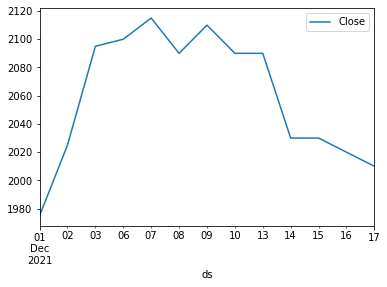

In [15]:
B.plot(x='ds', y='Close')

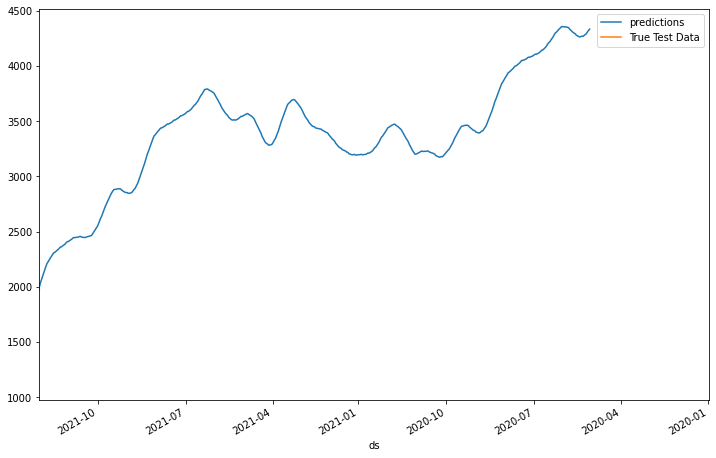

In [17]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2021-12-01', '2019-12-31'))